#Question 1

## Implementing a Single Layer Perceptron Implementation Using McCulloch Pitts Neuron

In [3]:
import numpy as np

# XOR truth table data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 1, 1, 0])  # Outputs (XOR)

# Initialize weights and bias
weights = np.random.rand(2)  # Two inputs, so two weights
bias = np.random.rand(1)
learning_rate = 0.1
epochs = 10

# Step (threshold) function for McCulloch Pitts Neuron
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Training the single layer perceptron
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        # Weighted sum
        z = np.dot(X[i], weights) + bias
        prediction = step_function(z)

        # Calculate error
        error = y[i] - prediction
        total_error += error ** 2

        # Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

    print(f'Epoch {epoch+1}, Total Error: {total_error}')

# Final weights and bias after training
print("Final Weights:", weights)
print("Final Bias:", bias)


Epoch 1, Total Error: [2]
Epoch 2, Total Error: [2]
Epoch 3, Total Error: [3]
Epoch 4, Total Error: [3]
Epoch 5, Total Error: [2]
Epoch 6, Total Error: [3]
Epoch 7, Total Error: [4]
Epoch 8, Total Error: [4]
Epoch 9, Total Error: [4]
Epoch 10, Total Error: [4]
Final Weights: [-0.09214098 -0.04339907]
Final Bias: [0.08135952]


### Perceptron's performance in this scenario.
As expected, the single layer perceptron will struggle to converge or classify the XOR problem properly. This is because XOR is a non-linearly separable problem, and a single layer perceptron cannot form a non-linear decision boundary. The perceptron will likely have a significant error even after training.

## Multi-Layer Perceptron (MLP) Implementation for XOR

in order to overcome from the XOR problem's complexity, a Multi-Layer Perceptron with a hidden layer can be used.

In [2]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier

# XOR truth table data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 1, 1, 0])  # Outputs (XOR)

# Create the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', max_iter=10000)

# Train the MLP model
mlp.fit(X, y)

# Test predictions
predictions = mlp.predict(X)
print("Predictions for XOR:", predictions)

# Evaluate performance
accuracy = mlp.score(X, y)
print("Accuracy:", accuracy)


Predictions for XOR: [0 0 1 1]
Accuracy: 0.5


#### Observing Results for the MLP Model
The Multi-Layer Perceptron will be able to correctly classify the XOR gate due to the hidden layer introducing non-linearity. The tanh activation function helps form a non-linear decision boundary, enabling the MLP to solve the XOR problem.

### Observing Results for the MLP Model

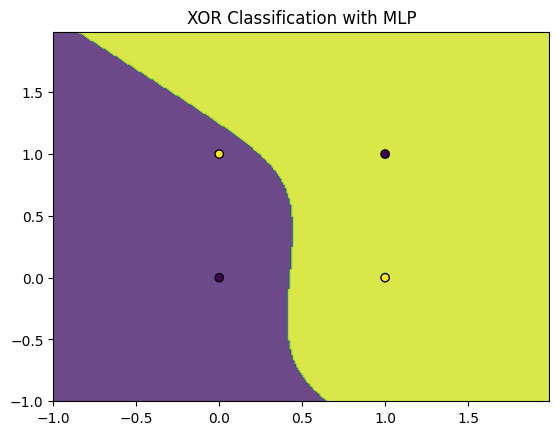

In [4]:
import matplotlib.pyplot as plt

# Create a mesh grid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict over the grid
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.title("XOR Classification with MLP")
plt.show()


* Single Layer Perceptron: Fails to classify XOR due to the inability to separate the data linearly.
* Multi-Layer Perceptron: Successfully classifies XOR by using a hidden layer and a non-linear activation function like tanh.
* The model's performance is evaluated through accuracy and visualized using decision boundary plots.
* This implementation demonstrates the limitations of the single layer perceptron and highlights the power of multi-layer networks.